In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# Overview: Using census data with a person's age, education, 
# marital status, and occupation (the features), try to predict
# whether or not the person earns more than $50000 a year.
# Train a logistic regression to output a number between 0 and 1
# to be interpreted as the probability that the individual has
# as income > 50000.

In [3]:
from __future__ import absolute_import, division,\
    print_function, unicode_literals

In [4]:
import tensorflow as tf
import tensorflow.feature_column as fc

In [5]:
import os
import sys
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [6]:
tf.enable_eager_execution()

In [8]:
#!pip install requests

In [9]:
#!git clone --depth 1 https://github.com/tensorflow/models

In [10]:
# Add the root directory of the repository to your Python path
model_path = os.path.join(os.getcwd(),'models')

In [11]:
sys.path.append(model_path)

In [12]:
# Download the dataset
from official.r1.wide_deep import census_dataset, census_main

In [13]:
census_dataset.download('/tmp/census_data')

In [14]:
# Command line usage
# Export PYTHONPATH=${PYTHONPATH}:"$(pwd)/models"
if "PYTHONPATH" in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + model_path
else:
    os.environ['PYTHONPATH'] = model_path

In [15]:
# See what command-line options are available.
!python -m official.r1.wide_deep.census_main --help



Train DNN on census income dataset.
flags:

/home/allisonrmcalister/my_tensorflow/models/official/r1/wide_deep/census_main.py:
  -bs,--batch_size:
    Batch size for training and evaluation. When using multiple gpus, this is
    the
    global batch size for all devices. For example, if the batch size is 32 and
    there are 4 GPUs, each GPU will get 8 examples on each step.
    (default: '40')
    (an integer)
  --[no]clean:
    If set, model_dir will be removed if it exists.
    (default: 'false')
  -dd,--data_dir:
    The location of the input data.
    (default: '/tmp/census_data')
  --[no]download_if_missing:
    Download data to data_dir if it is not already present.
    (default: 'true')
  -ebe,--epochs_between_evals:
    The number of training epochs to run between evaluations.
    (default: '2')
    (an integer)
  -ed,--export_dir:
    If set, a SavedModel serialization of the model will be exported to this
    directory at the end of training. See the README for more detail

In [16]:
# Run the model
!python -m official.r1.wide_deep.census_main --model_type=wide \
--train_epochs=2




W1021 11:06:40.506283 133823426000256 deprecation_wrapper.py:119] From /home/allisonrmcalister/my_tensorflow/models/official/r1/wide_deep/census_dataset.py:79: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1021 11:06:40.507183 133823426000256 deprecation_wrapper.py:119] From /home/allisonrmcalister/my_tensorflow/models/official/r1/wide_deep/census_dataset.py:82: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.


W1021 11:06:40.510316 133823426000256 deprecation_wrapper.py:119] From /home/allisonrmcalister/my_tensorflow/models/official/r1/wide_deep/census_main.py:49: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

INFO:tensorflow:Using config: {'_model_dir': '/tmp/census_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': device_count {
  key: "GPU"
  value: 0
}
, '_keep_checkpoint_max': 

INFO:tensorflow:Graph was finalized.
I1021 11:06:49.915116 133823426000256 monitored_session.py:240] Graph was finalized.
2019-10-21 11:06:49.916692: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2019-10-21 11:06:49.947817: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1094385000 Hz
2019-10-21 11:06:49.949215: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55eb63b07b50 executing computations on platform Host. Devices:
2019-10-21 11:06:49.949677: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #213: KMP_AFFINITY: x2APIC ids not unique - decoding legacy APIC ids.
OMP: Info #149: KMP

INFO:tensorflow:global_step/sec: 78.5575
I1021 11:07:22.538075 133823426000256 basic_session_run_hooks.py:692] global_step/sec: 78.5575
INFO:tensorflow:average_loss = 0.2811783, loss = 11.247132 (1.273 sec)
I1021 11:07:22.540088 133823426000256 basic_session_run_hooks.py:260] average_loss = 0.2811783, loss = 11.247132 (1.273 sec)
INFO:tensorflow:loss = 11.247132, step = 2430 (1.268 sec)
I1021 11:07:22.540816 133823426000256 basic_session_run_hooks.py:260] loss = 11.247132, step = 2430 (1.268 sec)
INFO:tensorflow:global_step/sec: 48.7932
I1021 11:07:24.587469 133823426000256 basic_session_run_hooks.py:692] global_step/sec: 48.7932
INFO:tensorflow:average_loss = 0.3694593, loss = 14.778372 (2.051 sec)
I1021 11:07:24.591063 133823426000256 basic_session_run_hooks.py:260] average_loss = 0.3694593, loss = 14.778372 (2.051 sec)
INFO:tensorflow:loss = 14.778372, step = 2530 (2.051 sec)
I1021 11:07:24.591835 133823426000256 basic_session_run_hooks.py:260] loss = 14.778372, step = 2530 (2.051 s

In [17]:
# Read the U.S. Census data
!ls /tmp/census_data/

adult.data  adult.test


In [18]:
train_file = "/tmp/census_data/adult.data"
test_file = "/tmp/census_data/adult.test"

In [19]:
import pandas

In [20]:
train_df = pandas.read_csv(train_file, header=None,\
                          names=census_dataset._CSV_COLUMNS)

In [21]:
test_df = pandas.read_csv(test_file, header=None, \
                         names=census_dataset._CSV_COLUMNS)

In [22]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
# Columns are grouped into two types, categorical and continuous.

In [24]:
# Converting data into tensors
# The input builder function returns the following pair:
# (features, labels)
def easy_input_function(df, label_key, num_epochs, shuffle, \
                        batch_size):
    label = df[label_key]
    ds = tf.data.Dataset.from_tensor_slices((dict(df), label))
    if shuffle:
        ds = ds.shuffle(10000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds

In [25]:
# Inspect the resulting dataset.
ds = easy_input_function(train_df, label_key='income_bracket',\
        num_epochs=5, shuffle=True, batch_size=10)

In [26]:
for feature_batch, label_batch in ds.take(1):
    print('Some feature keys:', list(feature_batch.keys())[:5])
    print()
    print('A batch of Ages: ', feature_batch['age'])
    print()
    print('A batch of Labels: ', label_batch)

Some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages:  tf.Tensor([28 63 33 43 35 25 51 21 55 49], shape=(10,), dtype=int32)

A batch of Labels:  tf.Tensor(
[b'<=50K' b'>50K' b'>50K' b'>50K' b'<=50K' b'<=50K' b'>50K' b'<=50K'
 b'<=50K' b'>50K'], shape=(10,), dtype=string)


In [27]:
import inspect

In [28]:
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(list(zip(_CSV_COLUMNS, columns)))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  data

In [29]:
# This input_fn returns equivalent output
ds = census_dataset.input_fn(train_file, num_epochs=5, \
                             shuffle=True, batch_size=10)


INFO:tensorflow:Parsing /tmp/census_data/adult.data



In [30]:
for feature_batch, label_batch in ds.take(1):
    print('Feature keys: ', list(feature_batch.keys())[:5])
    print()
    print('Age batch: ', feature_batch['age'])
    print()
    print('Label batch: ', label_batch)

Feature keys:  ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

Age batch:  tf.Tensor([28 30 61 27 32 35 57 53 55 59], shape=(10,), dtype=int32)

Label batch:  tf.Tensor([ True  True  True False False False  True False False  True], shape=(10,), dtype=bool)


In [31]:
# Estimators expect an input_fn that takes no arguments.
# Thus, we wrap configurable input function into an object with
# the expected signature.
# Configure the train_inpf to iterate over the data twice.
import functools

In [32]:
train_inpf = functools.partial(census_dataset.input_fn, \
                train_file, num_epochs=2, shuffle=True, \
                batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn,\
                test_file, num_epochs=1, shuffle=False,\
                batch_size=64)

In [33]:
# Selecting and Engineering features for the model
# Estimators use a system called feature columns to describe
# how the model should interpret each of the raw input features.
# An Estimator expects a vector of numeric inputs, and feature
# columns describe how the model should convert each feature.

In [34]:
# Base feature columns

In [35]:
# Numeric columns
age = fc.numeric_column('age')

In [36]:
fc.input_layer(feature_batch, [age]).numpy()

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


array([[28.],
       [30.],
       [61.],
       [27.],
       [32.],
       [35.],
       [57.],
       [53.],
       [55.],
       [59.]], dtype=float32)

In [37]:
# The following will train and evaluate a model using only the
# age feature.
classifier = tf.estimator.LinearClassifier(feature_columns=[age])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdg9srf36', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64fec56d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
classifier.train(train_inpf)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdg9srf36/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 31.9622
INFO:tensorflow:loss = 35.545483, step = 101 (3.146 sec)
INFO:tensorflow:global_step/sec: 69.9861
INFO:tensorflow:loss = 35.65708, step = 201 (1.414 sec)
INFO:tensorflow:global_step/sec: 67.6257
INFO:tensorflow:loss = 34.818638, step = 301 (1.492 sec)
INFO:

In [39]:
result = classifier.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T11:09:58Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpdg9srf36/model.ckpt-1018
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-11:10:07
INFO:tensorflow:Saving dict for global step 1018: accuracy = 0.7421534, accuracy_baseline = 0.76377374, auc = 0.67835236, auc_precision_recall = 0.31139085, average_loss = 0.52771264, global_step = 1018, label/mean = 0.23622628, loss = 33.6929, precision = 0.1845878, prediction/mean = 0.28068155, recall = 0.026781071
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1018: /tmp/t

In [40]:
# Used for display in notebook
clear_output()

In [41]:
print(result)

{'accuracy': 0.7421534, 'accuracy_baseline': 0.76377374, 'auc': 0.67835236, 'auc_precision_recall': 0.31139085, 'average_loss': 0.52771264, 'label/mean': 0.23622628, 'loss': 33.6929, 'precision': 0.1845878, 'prediction/mean': 0.28068155, 'recall': 0.026781071, 'global_step': 1018}


In [42]:
# Similarly, define a NumericColumn for each continuous
# feature column that we want to use in the model
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column(\
                                    'hours_per_week')

In [43]:
my_numeric_columns = [age, education_num, capital_gain, \
                      capital_loss, hours_per_week]

In [44]:
fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[2.800e+01, 5.178e+03, 0.000e+00, 1.300e+01, 4.000e+01],
       [3.000e+01, 0.000e+00, 0.000e+00, 1.300e+01, 4.000e+01],
       [6.100e+01, 0.000e+00, 0.000e+00, 9.000e+00, 5.000e+01],
       [2.700e+01, 0.000e+00, 0.000e+00, 1.000e+01, 4.000e+01],
       [3.200e+01, 0.000e+00, 0.000e+00, 1.000e+01, 3.500e+01],
       [3.500e+01, 0.000e+00, 0.000e+00, 9.000e+00, 2.500e+01],
       [5.700e+01, 0.000e+00, 0.000e+00, 9.000e+00, 8.400e+01],
       [5.300e+01, 0.000e+00, 0.000e+00, 9.000e+00, 4.800e+01],
       [5.500e+01, 0.000e+00, 0.000e+00, 3.000e+00, 4.000e+01],
       [5.900e+01, 0.000e+00, 0.000e+00, 9.000e+00, 6.000e+01]],
      dtype=float32)

In [45]:
# Can retrain a model on these features by changing the
# feature_columns argument to the constructor
classifier = tf.estimator.LinearClassifier(\
                    feature_columns=my_numeric_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi0yt8v3m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64ec167da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
# train the classifier on the training data
classifier.train(train_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi0yt8v3m/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 32.8253
INFO:tensorflow:loss = 340.19464, step = 101 (3.056 sec)
INFO:tensorflow:global_step/sec: 83.4548
INFO:tensorflow:loss = 114.646866, step = 201 (1.192 sec)
INFO:tensorflow:global_step/sec: 55.4374
INFO:tensorflow:loss = 226.56622, step = 301 (1.805 sec)
INFO:tensorflow:global_step/sec: 77.6547
INFO:tensorflow:loss = 96.96765, step = 401 (1.289 sec)
INFO:tensorflow:global_step/sec: 62.4144
INFO:tensorflow:loss = 208.70374, step = 501 (1.600 sec)
INFO:tensorflow:global_step/sec: 64.1953
INFO:tensorflow:loss = 180.11867, step = 601 (1.557 sec)
INFO:

In [47]:
# Evaluate the classifier on the test data
result = classifier.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T11:15:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi0yt8v3m/model.ckpt-1018
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-11:15:17
INFO:tensorflow:Saving dict for global step 1018: accuracy = 0.7826301, accuracy_baseline = 0.76377374, auc = 0.55260354, auc_precision_recall = 0.38721228, average_loss = 1.5634376, global_step = 1018, label/mean = 0.23622628, loss = 99.82089, precision = 0.61619985, prediction/mean = 0.16162592, recall = 0.21164846
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1018: /tmp/tmpi0yt8v3m/model.ckpt-1018


In [48]:
clear_output()

In [49]:
for key, value in sorted(result.items()):
    print('%s: %s' % (key, value))

accuracy: 0.7826301
accuracy_baseline: 0.76377374
auc: 0.55260354
auc_precision_recall: 0.38721228
average_loss: 1.5634376
global_step: 1018
label/mean: 0.23622628
loss: 99.82089
precision: 0.61619985
prediction/mean: 0.16162592
recall: 0.21164846


In [51]:
# Categorical columns
# Define feature columns for categorical features.
# This creates a sparse one-hot vector from the raw input feature
relationship = fc.categorical_column_with_vocabulary_list(\
                    'relationship',\
                    ['Husband', 'Not-in-family', 'Wife',\
                    'Own-child', 'Unmarried', 'Other-relative'])

In [52]:
# The input_layer function we're using is designed for DNN models
# and expects dense inputs.
# To demonstrate the categorical column, wrap it in a
# tf.feature_column.indicator_column to create the dense
# one-hot output. (Linear Estimators can often skip this dense
# step).
# Note: The other sparse-to-dense option is 
# tf.feature_column.embedding_column

In [53]:
# Run the input layer, configured with both the age and 
# relationship columns.
fc.input_layer(feature_batch, [age, \
                        fc.indicator_column(relationship)])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


<tf.Tensor: id=5099, shape=(10, 7), dtype=float32, numpy=
array([[28.,  1.,  0.,  0.,  0.,  0.,  0.],
       [30.,  0.,  1.,  0.,  0.,  0.,  0.],
       [61.,  1.,  0.,  0.,  0.,  0.,  0.],
       [27.,  1.,  0.,  0.,  0.,  0.,  0.],
       [32.,  0.,  1.,  0.,  0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  0.,  1.],
       [57.,  1.,  0.,  0.,  0.,  0.,  0.],
       [53.,  0.,  0.,  0.,  0.,  1.,  0.],
       [55.,  1.,  0.,  0.,  0.,  0.,  0.],
       [59.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)>

In [54]:
# If we don't know the set of possible values in advance,
# use the categorical_column_with_hash_bucket instead.
occupation = tf.feature_column.\
    categorical_column_with_hash_bucket(\
        'occupation', hash_bucket_size=1000)

In [56]:
# Each possible value in the feature column occupation is hashed
# to an integer ID as we encounter them in training.
for item in feature_batch['occupation'].numpy():
    print(item.decode())

Exec-managerial
Prof-specialty
Exec-managerial
Other-service
Other-service
?
Craft-repair
Craft-repair
Machine-op-inspct
Sales


In [57]:
# Run input_layer with the hashed column.
# Note that the output shape is (batch_size, hash_bucket_size)
occupation_result = fc.input_layer(feature_batch,\
        [fc.indicator_column(occupation)])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [58]:
occupation_result.numpy().shape

(10, 1000)

In [59]:
# It's easier to see the actual results if we take the tf.argmax
# over the hash_bucket_size dimension. Any duplicate occupations
# are mapped to the same pseudo-random index.
tf.argmax(occupation_result, axis=1).numpy()

array([800, 979, 800, 527, 527,  65, 466, 466, 911, 631])

In [60]:
# Hash collisions are unavoidable, but they often have minimal
# impact on model quality. The effect may be noticeable if the
# hash buckets are being used to copress the input space.
# In a SparseColumn: each feature string is mapped into an 
# integer ID by looking up a fixed mapping or by hashing.
# Under the hood, the LinearModel class is responsible for 
# managing the mapping and creating tf.Variable to store the
# model parameters for each feature ID. These parameters are
# learned through the model training process.

In [61]:
# Let's define the other categorical features.
education = tf.feature_column.\
    categorical_column_with_vocabulary_list(\
        'education', [\
            'Bachelors', 'HS-grad', '11th', 'Masters', '9th',\
            'Some-college', 'Assoc-acdm', 'Assoc-voc', \
            '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', \
            '10th', '1st-4th', 'Preschool', '12th'])

In [62]:
marital_status = tf.feature_column.\
    categorical_column_with_vocabulary_list(\
        'marital_status', [\
            'Married-civ-spouse', 'Divorced', \
            'Married-spouse-absent', 'Never-married', \
            'Separated', 'Married-AF-spouse', 'Widowed'])

In [63]:
workclass = tf.feature_column.\
    categorical_column_with_vocabulary_list(\
        'workclass', [\
            'Self-emp-not-inc', 'Private', 'State-gov',\
            'Federal-gov', 'Local-gov', '?', 'Self-emp-inc',\
            'Without-pay', 'Never-worked'])

In [64]:
my_categorical_columns = [relationship, occupation, education,\
                         marital_status, workclass]

In [65]:
# Use both sets of columns to configure a model that uses all 
# these features.
classifier = tf.estimator.LinearClassifier(feature_columns=\
                my_numeric_columns+my_categorical_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpm_uvq8ik', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64d9eb2ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [66]:
# Train the model.
classifier.train(train_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpm_uvq8ik/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 15.7524
INFO:tensorflow:loss = 126.40102, step = 101 (6.351 sec)
INFO:tensorflow:global_step/sec: 74.8529
INFO:tensorflow:loss = 20.836552, step = 201 (1.335 sec)
INFO:tensorflow:global_step/sec: 75.2146
INFO:tensorflow:loss = 310.34763, step = 301 (1.330 sec)
INFO:tensorflow:global_step/sec: 61.1475
INFO:tensorflow:loss = 273.40576, step = 401 (1.636 sec)
INFO:tensorflow:global_step/sec: 74.3817
INFO:tensorflow:loss = 32.962845, step = 501 (1.344 sec)
INFO:tensorflow:global_step/sec: 64.5477
INFO:tensorflow:loss = 63.259445, step = 601 (1.549 sec)
INFO:

In [67]:
# Evaluate on the test data.
result = classifier.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T11:33:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpm_uvq8ik/model.ckpt-1018
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-11:34:03
INFO:tensorflow:Saving dict for global step 1018: accuracy = 0.8259321, accuracy_baseline = 0.76377374, auc = 0.8727909, auc_precision_recall = 0.6489683, average_loss = 0.86279136, global_step = 1018, label/mean = 0.23622628, loss = 55.086693, precision = 0.6719918, prediction/mean = 0.20966749, recall = 0.5140406
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1018: /tmp/tmpm_uvq8ik/model.ckpt-1018


In [68]:
clear_output()

In [69]:
for key, value in sorted(result.items()):
    print('%s: %s' % (key, value))

accuracy: 0.8259321
accuracy_baseline: 0.76377374
auc: 0.8727909
auc_precision_recall: 0.6489683
average_loss: 0.86279136
global_step: 1018
label/mean: 0.23622628
loss: 55.086693
precision: 0.6719918
prediction/mean: 0.20966749
recall: 0.5140406


In [70]:
# Derived Feature Columns
# Make Continuous Features Categorical through Bucketization

In [71]:
# Define a bucketized_column over age as:
age_buckets = tf.feature_column.bucketized_column(\
    age, boundaries=[18,25,30,35,40,45,50,55,60,65])

In [72]:
# With bucketing, the model sees each bucket as a one-hot
# feature.
fc.input_layer(feature_batch, [age, age_buckets]).numpy()

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


array([[28.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [27.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [32.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [57.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [59.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]],
      dtype=float32)

In [73]:
# Learn complex relationships with crossed column
# Learn the differences between different feature combinations
# by adding crossed feature columns to the model.
education_x_occupation = tf.feature_column.crossed_column(\
    ['education','occupation'], hash_bucket_size=1000
)

In [74]:
education_x_occupation

CrossedColumn(keys=('education', 'occupation'), hash_bucket_size=1000, hash_key=None)

In [75]:
# Can create a crossed_column over more than 2 columns.
age_buckets_x_education_x_occupation = tf.feature_column.\
    crossed_column([age_buckets, 'education', 'occupation'], \
        hash_bucket_size=1000)

In [76]:
# Define the logistic regression model
import tempfile

In [77]:
base_columns = [education, marital_status, relationship,\
               workclass, occupation, age_buckets,]

In [78]:
crossed_columns = [\
    tf.feature_column.crossed_column(['education', \
        'occupation'], hash_bucket_size=1000), \
    tf.feature_column.crossed_column([age_buckets, 'education',\
        'occupation'], hash_bucket_size=1000),
]

In [79]:
model = tf.estimator.LinearClassifier(\
            model_dir=tempfile.mkdtemp(),\
            feature_columns=base_columns + crossed_columns, \
            optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8pe6xbru', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64d1dc2748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [80]:
# The model automatically learns a bias term. The learned 
# model files are stored in model_dir.

In [81]:
# train and evaluate the model
train_inpf = functools.partial(census_dataset.input_fn, \
                train_file, num_epochs=40, shuffle=True,\
                batch_size=64)

In [82]:
model.train(train_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8pe6xbru/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 12.2669
INFO:tensorflow:loss = 22.143618, step = 101 (8.155 sec)
INFO:tensorflow:global_step/sec: 55.9093
INFO:tensorflow:loss = 21.926872, step = 201 (1.788 sec)
INFO:tensorflow:global_step/sec: 61.2236
INFO:tensorflow:loss = 18.140121, step = 301 (1.638 sec)
INFO:tensorflow:global_step/sec: 60.5248
INFO:tensorflow:loss = 35.78372, step = 401 (1.648 sec)
INFO:tensorflow:global_step/sec: 61.4963
INFO:tensorflow:loss = 26.052338, step = 501 (1.626 sec)
INFO:tensorflow:global_step/sec: 58.4288
INFO:tensorflow:loss = 21.324524, step = 601 (1.711 sec)
INFO:t

INFO:tensorflow:global_step/sec: 65.6959
INFO:tensorflow:loss = 26.56285, step = 8001 (1.527 sec)
INFO:tensorflow:global_step/sec: 60.8759
INFO:tensorflow:loss = 18.095757, step = 8101 (1.638 sec)
INFO:tensorflow:global_step/sec: 62.875
INFO:tensorflow:loss = 34.16572, step = 8201 (1.590 sec)
INFO:tensorflow:global_step/sec: 61.3112
INFO:tensorflow:loss = 26.526356, step = 8301 (1.631 sec)
INFO:tensorflow:global_step/sec: 55.5332
INFO:tensorflow:loss = 24.79319, step = 8401 (1.801 sec)
INFO:tensorflow:global_step/sec: 51.9683
INFO:tensorflow:loss = 21.923412, step = 8501 (1.933 sec)
INFO:tensorflow:global_step/sec: 45.9765
INFO:tensorflow:loss = 23.559433, step = 8601 (2.166 sec)
INFO:tensorflow:global_step/sec: 26.9936
INFO:tensorflow:loss = 24.696884, step = 8701 (3.706 sec)
INFO:tensorflow:global_step/sec: 37.901
INFO:tensorflow:loss = 16.850243, step = 8801 (2.638 sec)
INFO:tensorflow:global_step/sec: 53.9082
INFO:tensorflow:loss = 22.620258, step = 8901 (1.855 sec)
INFO:tensorflow

INFO:tensorflow:loss = 20.942245, step = 16201 (4.641 sec)
INFO:tensorflow:global_step/sec: 41.2286
INFO:tensorflow:loss = 22.117785, step = 16301 (2.425 sec)
INFO:tensorflow:global_step/sec: 31.8717
INFO:tensorflow:loss = 14.035875, step = 16401 (3.137 sec)
INFO:tensorflow:global_step/sec: 34.1383
INFO:tensorflow:loss = 26.202158, step = 16501 (2.938 sec)
INFO:tensorflow:global_step/sec: 37.219
INFO:tensorflow:loss = 23.140028, step = 16601 (2.683 sec)
INFO:tensorflow:global_step/sec: 28.5836
INFO:tensorflow:loss = 20.84401, step = 16701 (3.493 sec)
INFO:tensorflow:global_step/sec: 33.981
INFO:tensorflow:loss = 33.904533, step = 16801 (2.952 sec)
INFO:tensorflow:global_step/sec: 35.8668
INFO:tensorflow:loss = 17.828074, step = 16901 (2.785 sec)
INFO:tensorflow:global_step/sec: 36.5124
INFO:tensorflow:loss = 25.427305, step = 17001 (2.733 sec)
INFO:tensorflow:global_step/sec: 34.8959
INFO:tensorflow:loss = 25.495335, step = 17101 (2.866 sec)
INFO:tensorflow:global_step/sec: 22.339
INFO

In [83]:
clear_output() # used for notebook display

In [84]:
results = model.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T11:55:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8pe6xbru/model.ckpt-20351
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-11:56:03
INFO:tensorflow:Saving dict for global step 20351: accuracy = 0.8347153, accuracy_baseline = 0.76377374, auc = 0.88157046, auc_precision_recall = 0.6917119, average_loss = 0.35462317, global_step = 20351, label/mean = 0.23622628, loss = 22.641645, precision = 0.6805252, prediction/mean = 0.24053533, recall = 0.56604266
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20351: /tmp/tmp8pe6xbru/model.ckpt-20351


In [85]:
clear_output()

In [86]:
for key, value in sorted(results.items()):
    print('%s: %0.2f' % (key, value))

accuracy: 0.83
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.64
precision: 0.68
prediction/mean: 0.24
recall: 0.57


In [87]:
# After the model is evaluated, we can use it to predict whether
# an individual has an annual income of > $50000 given info
# input.

In [88]:
import numpy as np

In [90]:
predict_df = test_df[:20].copy()

In [91]:
pred_iter = model.predict(lambda:easy_input_function(\
                predict_df, label_key='income_bracket', \
                num_epochs=1, shuffle=False, batch_size=10))

In [92]:
classes = np.array(['<=50K', '>50K'])

In [93]:
pred_class_id = []

In [94]:
for pred_dict in pred_iter:
    pred_class_id.append(pred_dict['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8pe6xbru/model.ckpt-20351
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [95]:
predict_df['predicted_class'] = classes[np.array(pred_class_id)]

In [96]:
predict_df['correct'] = predict_df['predicted_class'] == \
                            predict_df['income_bracket']

In [97]:
clear_output()

In [98]:
predict_df[['income_bracket','predicted_class','correct']]

,income_bracket,predicted_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,<=50K,False
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


In [99]:
# Add Regularization to Prevent Overfitting
# Add L1 and L2 regularizations to the model.
model_l1 = tf.estimator.LinearClassifier(\
    feature_columns=base_columns+crossed_columns,\
    optimizer=tf.train.FtrlOptimizer(\
                learning_rate=0.1,\
                l1_regularization_strength=10.0,\
                l2_regularization_strength=0.0))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr2qp_1o_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64c4bd1a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [100]:
model_l1.train(train_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpr2qp_1o_/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 10.3812
INFO:tensorflow:loss = 22.892572, step = 101 (9.635 sec)
INFO:tensorflow:global_step/sec: 44.0596
INFO:tensorflow:loss = 21.65912, step = 201 (2.270 sec)
INFO:tensorflow:global_step/sec: 42.5164
INFO:tensorflow:loss = 24.648224, step = 301 (2.358 sec)
INFO:tensorflow:global_step/sec: 47.2
INFO:tensorflow:loss = 25.049541, step = 401 (2.112 sec)
INFO:tensorflow:global_step/sec: 21.3486
INFO:tensorflow:loss = 18.647076, step = 501 (4.702 sec)
INFO:tensorflow:global_step/sec: 56.0859
INFO:tensorflow:loss = 22.595654, step = 601 (1.766 sec)
INFO:tens

INFO:tensorflow:loss = 21.862007, step = 8001 (3.016 sec)
INFO:tensorflow:global_step/sec: 40.344
INFO:tensorflow:loss = 26.388714, step = 8101 (2.462 sec)
INFO:tensorflow:global_step/sec: 29.524
INFO:tensorflow:loss = 25.486734, step = 8201 (3.391 sec)
INFO:tensorflow:global_step/sec: 43.0379
INFO:tensorflow:loss = 20.81356, step = 8301 (2.322 sec)
INFO:tensorflow:global_step/sec: 40.0443
INFO:tensorflow:loss = 24.553158, step = 8401 (2.508 sec)
INFO:tensorflow:global_step/sec: 40.4129
INFO:tensorflow:loss = 26.758255, step = 8501 (2.460 sec)
INFO:tensorflow:global_step/sec: 29.2336
INFO:tensorflow:loss = 20.62527, step = 8601 (3.421 sec)
INFO:tensorflow:global_step/sec: 44.4379
INFO:tensorflow:loss = 25.214245, step = 8701 (2.271 sec)
INFO:tensorflow:global_step/sec: 36.5531
INFO:tensorflow:loss = 25.933235, step = 8801 (2.718 sec)
INFO:tensorflow:global_step/sec: 35.8575
INFO:tensorflow:loss = 19.88197, step = 8901 (2.788 sec)
INFO:tensorflow:global_step/sec: 57.2486
INFO:tensorflow

INFO:tensorflow:global_step/sec: 28.7292
INFO:tensorflow:loss = 21.166893, step = 16301 (3.473 sec)
INFO:tensorflow:global_step/sec: 43.4076
INFO:tensorflow:loss = 19.9693, step = 16401 (2.310 sec)
INFO:tensorflow:global_step/sec: 34.9943
INFO:tensorflow:loss = 26.31799, step = 16501 (2.861 sec)
INFO:tensorflow:global_step/sec: 25.2146
INFO:tensorflow:loss = 20.343159, step = 16601 (3.955 sec)
INFO:tensorflow:global_step/sec: 48.7811
INFO:tensorflow:loss = 24.513645, step = 16701 (2.054 sec)
INFO:tensorflow:global_step/sec: 52.4692
INFO:tensorflow:loss = 22.357773, step = 16801 (1.903 sec)
INFO:tensorflow:global_step/sec: 55.0626
INFO:tensorflow:loss = 22.713112, step = 16901 (1.815 sec)
INFO:tensorflow:global_step/sec: 52.7665
INFO:tensorflow:loss = 19.244877, step = 17001 (1.895 sec)
INFO:tensorflow:global_step/sec: 57.514
INFO:tensorflow:loss = 17.103054, step = 17101 (1.740 sec)
INFO:tensorflow:global_step/sec: 53.8905
INFO:tensorflow:loss = 21.214241, step = 17201 (1.855 sec)
INFO

In [101]:
results = model_l1.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T12:15:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr2qp_1o_/model.ckpt-20351
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-12:16:04
INFO:tensorflow:Saving dict for global step 20351: accuracy = 0.83625084, accuracy_baseline = 0.76377374, auc = 0.8834158, auc_precision_recall = 0.6942101, average_loss = 0.35189873, global_step = 20351, label/mean = 0.23622628, loss = 22.4677, precision = 0.691186, prediction/mean = 0.23753026, recall = 0.5546022
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20351: /tmp/tmpr2qp_1o_/model.ckpt-20351


In [102]:
clear_output()

In [103]:
for key in sorted(results):
    print('%s: %0.2f' % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.47
precision: 0.69
prediction/mean: 0.24
recall: 0.55


In [104]:
model_l2 = tf.estimator.LinearClassifier(\
    feature_columns=base_columns+crossed_columns, \
    optimizer=tf.train.FtrlOptimizer(\
            learning_rate=0.1,\
            l1_regularization_strength=0.0,\
            l2_regularization_strength=10.0))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp60a0scbz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7a64c22e97b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [105]:
model_l2.train(train_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp60a0scbz/model.ckpt.
INFO:tensorflow:loss = 44.361427, step = 1
INFO:tensorflow:global_step/sec: 8.72491
INFO:tensorflow:loss = 21.972612, step = 101 (11.468 sec)
INFO:tensorflow:global_step/sec: 36.6272
INFO:tensorflow:loss = 24.888165, step = 201 (2.726 sec)
INFO:tensorflow:global_step/sec: 20.645
INFO:tensorflow:loss = 22.745491, step = 301 (4.844 sec)
INFO:tensorflow:global_step/sec: 23.2415
INFO:tensorflow:loss = 26.423792, step = 401 (4.301 sec)
INFO:tensorflow:global_step/sec: 31.8747
INFO:tensorflow:loss = 26.324856, step = 501 (3.138 sec)
INFO:tensorflow:global_step/sec: 34.8762
INFO:tensorflow:loss = 22.109257, step = 601 (2.867 sec)
INFO:

INFO:tensorflow:global_step/sec: 24.6188
INFO:tensorflow:loss = 26.259502, step = 8001 (4.062 sec)
INFO:tensorflow:global_step/sec: 27.2011
INFO:tensorflow:loss = 14.9981785, step = 8101 (3.695 sec)
INFO:tensorflow:global_step/sec: 28.495
INFO:tensorflow:loss = 23.111376, step = 8201 (3.496 sec)
INFO:tensorflow:global_step/sec: 29.7196
INFO:tensorflow:loss = 26.114553, step = 8301 (3.359 sec)
INFO:tensorflow:global_step/sec: 25.6072
INFO:tensorflow:loss = 30.621256, step = 8401 (3.911 sec)
INFO:tensorflow:global_step/sec: 28.0204
INFO:tensorflow:loss = 20.425068, step = 8501 (3.569 sec)
INFO:tensorflow:global_step/sec: 28.5873
INFO:tensorflow:loss = 32.598915, step = 8601 (3.496 sec)
INFO:tensorflow:global_step/sec: 39.2042
INFO:tensorflow:loss = 20.82022, step = 8701 (2.558 sec)
INFO:tensorflow:global_step/sec: 52.569
INFO:tensorflow:loss = 25.531124, step = 8801 (1.904 sec)
INFO:tensorflow:global_step/sec: 30.4289
INFO:tensorflow:loss = 22.146124, step = 8901 (3.278 sec)
INFO:tensorf

INFO:tensorflow:loss = 16.230854, step = 16201 (3.402 sec)
INFO:tensorflow:global_step/sec: 27.2283
INFO:tensorflow:loss = 18.419064, step = 16301 (3.670 sec)
INFO:tensorflow:global_step/sec: 37.1709
INFO:tensorflow:loss = 19.92577, step = 16401 (2.688 sec)
INFO:tensorflow:global_step/sec: 29.9014
INFO:tensorflow:loss = 19.953716, step = 16501 (3.343 sec)
INFO:tensorflow:global_step/sec: 38.7254
INFO:tensorflow:loss = 18.518345, step = 16601 (2.582 sec)
INFO:tensorflow:global_step/sec: 36.2955
INFO:tensorflow:loss = 29.606781, step = 16701 (2.756 sec)
INFO:tensorflow:global_step/sec: 31.8955
INFO:tensorflow:loss = 22.788149, step = 16801 (3.135 sec)
INFO:tensorflow:global_step/sec: 46.5859
INFO:tensorflow:loss = 24.404568, step = 16901 (2.146 sec)
INFO:tensorflow:global_step/sec: 33.7257
INFO:tensorflow:loss = 22.808517, step = 17001 (2.965 sec)
INFO:tensorflow:global_step/sec: 30.8978
INFO:tensorflow:loss = 16.243444, step = 17101 (3.239 sec)
INFO:tensorflow:global_step/sec: 32.3165
I

In [106]:
results = model_l2.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T12:34:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp60a0scbz/model.ckpt-20351
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-21-12:35:09
INFO:tensorflow:Saving dict for global step 20351: accuracy = 0.8358209, accuracy_baseline = 0.76377374, auc = 0.88348794, auc_precision_recall = 0.6943646, average_loss = 0.35183856, global_step = 20351, label/mean = 0.23622628, loss = 22.463858, precision = 0.6922321, prediction/mean = 0.23453863, recall = 0.54914194
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20351: /tmp/tmp60a0scbz/model.ckpt-20351


In [107]:
clear_output()

In [108]:
for key in sorted(results):
    print('%s: %0.2f' % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.46
precision: 0.69
prediction/mean: 0.23
recall: 0.55


In [109]:
# Regularized models don't perform much better than the base 
# model.
# Look at model's weight distributions.
def get_flat_weights(model):
    weight_names = [name for name in model.get_variable_names() \
                   if "linear_model" in name and "Ftrl" not in\
                   name]
    weight_values = [model.get_variable_value(name) for name \
                    in weight_names]
    weights_flat = np.concatenate([item.flatten() for item in\
                        weight_values], axis=0)
    return weights_flat

In [110]:
weights_flat = get_flat_weights(model)

In [112]:
weights_flat_l1 = get_flat_weights(model_l1)

In [113]:
weights_flat_l2 = get_flat_weights(model_l2)

In [114]:
weights_flat, weights_flat_l1, weights_flat_l2

(array([-2.579648  , -1.8518926 , -0.91303337, ...,  0.29046994,
        -2.0966153 , -0.71069014], dtype=float32),
 array([-2.099156  , -1.8822755 , -0.9096276 , ...,  0.21386078,
        -1.5875126 ,  0.        ], dtype=float32),
 array([-1.7039373 , -1.8455409 , -0.9021592 , ...,  0.22922218,
        -1.3374196 , -0.24642293], dtype=float32))

In [115]:
# The models have many zero-vaued weights caused by unused hash
# bins. Mask these weights when viewing the weight distributions.
weight_mask = weights_flat != 0

In [116]:
weights_base = weights_flat[weight_mask]

In [117]:
weights_l1 = weights_flat_l1[weight_mask]

In [118]:
weights_l2 = weights_flat_l2[weight_mask]

(0, 500)

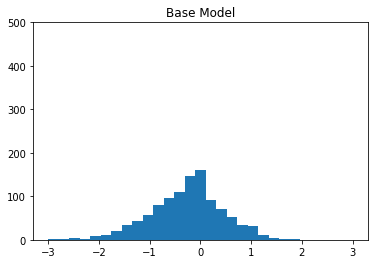

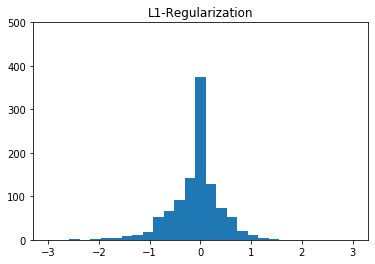

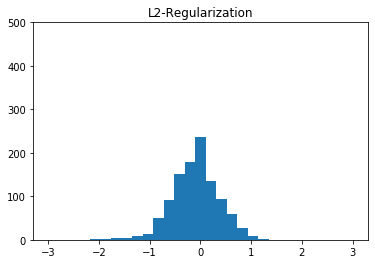

In [119]:
# Plot the distributions
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1-Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2-Regularization')
plt.ylim([0,500])

In [120]:
# Both types of regularization squeeze the distribution 
# of weights toward 0. L2 regularization has a greater effect
# in the tails of the distribution. L1 regularization produces
# more exactly-zero values.